In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['all_stocks_5yr.csv', 'merge.sh', 'individual_stocks_5yr', 'getSandP.py']


In [4]:
data = pd.read_csv('../input/all_stocks_5yr.csv')
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
data.tail()

In [5]:
data[data.isnull().any(axis=1)]

,date,open,high,low,close,volume,Name
82949,2017-07-26,NaN,NaN,NaN,69.0842,3,BHF
165734,2015-07-17,NaN,88.76,88.24,88.7200,2056819,DHR
165857,2016-01-12,NaN,NaN,NaN,88.5500,0,DHR
205076,2015-07-17,NaN,48.49,47.85,47.9200,1246786,ES
239832,2016-07-01,NaN,NaN,NaN,49.5400,0,FTV
434379,2015-07-17,NaN,47.31,46.83,46.9900,1229513,O
434502,2016-01-12,NaN,NaN,NaN,52.4300,0,O
478594,2015-06-09,NaN,NaN,NaN,526.0900,12135,REGN
558213,2016-04-07,NaN,NaN,NaN,41.5600,0,UA
581906,2015-05-12,NaN,NaN,NaN,124.0800,569747,VRTX


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
date      619040 non-null object
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [7]:
companies = data.Name.unique()
companies

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

## Data Exploration

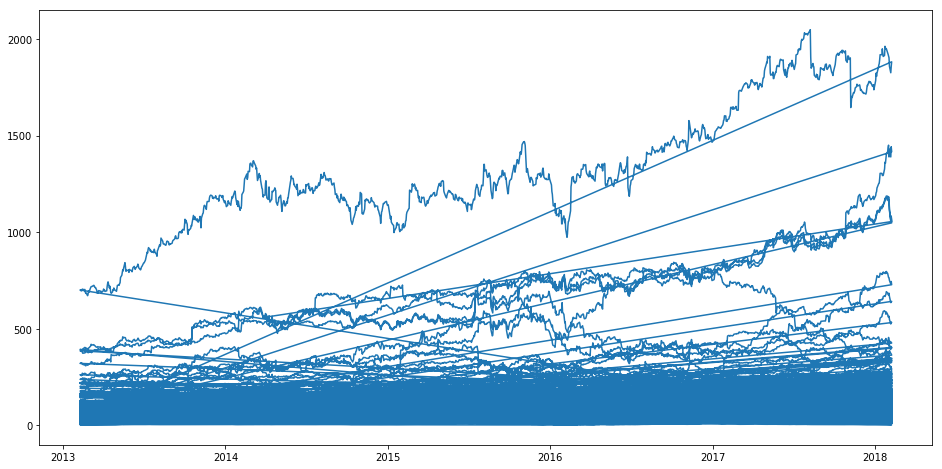

In [8]:
#preprocesing the data
data['date'] = pd.to_datetime(data.date,format='%Y-%m-%d')
data.index = data['date']
                    
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

plt.figure(figsize=(16,8))
plt.plot(data['close'], label='Close Price history');

In [9]:
#Taking AAl data for predicting
cl = data[data['Name']=='AAL'].close


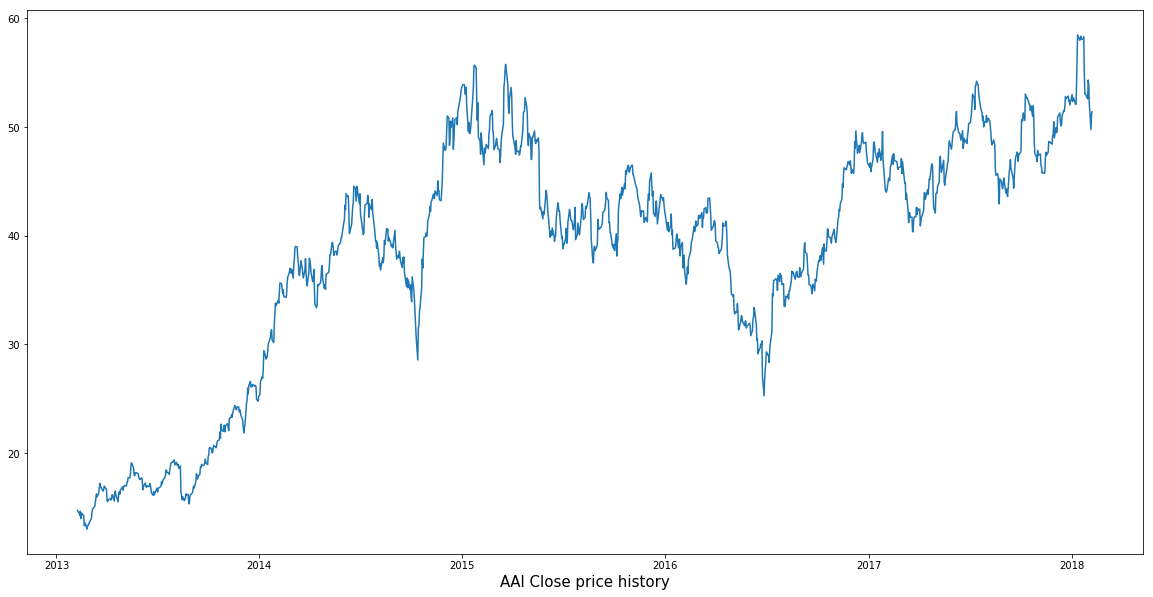

In [10]:
plt.plot(cl)
plt.xlabel('AAl Close price history',fontsize=15)
plt.show();

## Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scl = MinMaxScaler()
cl = np.array(cl, dtype=pd.Series)
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.03806381],
       [0.03168317],
       [0.02750275],
       ...,
       [0.80836084],
       [0.83960396],
       [0.84444444]])


## Splitting the data into training and testing

In [13]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


## Bench Mark Model

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(X_train.reshape(-1,1)[:1000],y_train)


In [15]:
reg.predict(X_test.reshape(-1,1))

array([3.12344046, 3.06316602, 3.04462003, ..., 3.95615511, 3.79109586,
       3.57410785])

## Testing the score for the bench mark Model

We got the Score for The Bech Mark less than .50

In [16]:
reg.score(X_train.reshape(-1,1)[:1000],y_train)

0.3263637276714875

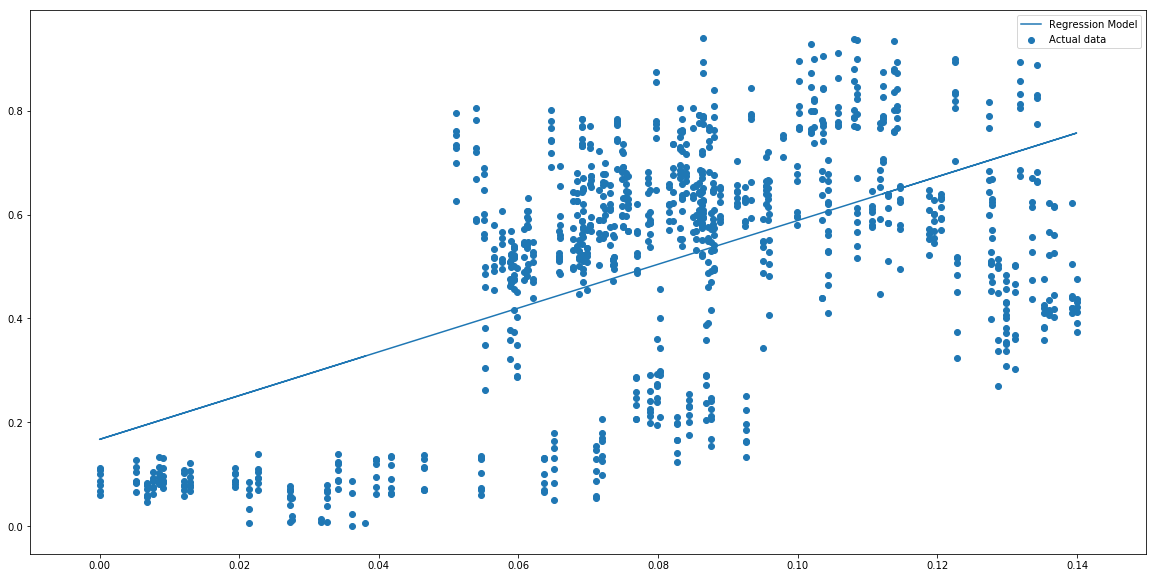

In [17]:
plt.scatter(X_train.reshape(-1,1)[:1000],y_train,label="Actual data")
plt.plot(X_train.reshape(-1,1)[:1000],reg.predict(X_train.reshape(-1,1)[:1000]),label='Regression Model')
plt.legend()
plt.show();

## Building the LSTM Model

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))


Using TensorFlow backend.



## Training the model with 300 epochs

In [19]:
historyt = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 2/300
1000/1000 [==============================] - 1s 682us/step - loss: 0.0041 - val_loss: 0.0013
Epoch 3/300
1000/1000 [==============================] - 1s 655us/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/300
1000/1000 [==============================] - 1s 655us/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/300
1000/1000 [==============================] - 1s 662us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/300
1000/1000 [==============================] - 1s 660us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/300
1000/1000 [==============================] - 1s 657us/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/300
1000/1000 [==============================] - 1s 662us/step - loss: 0.0013 - val_loss: 0.0010
Epoch 9/300
1000/1000 [==============================] - 1s 659us/step - loss: 0.0014 - val_loss: 0.0010
Epoch 10/3

1000/1000 [==============================] - 1s 660us/step - loss: 4.0118e-04 - val_loss: 4.1347e-04
Epoch 145/300
1000/1000 [==============================] - 1s 658us/step - loss: 3.9918e-04 - val_loss: 4.1491e-04
Epoch 146/300
1000/1000 [==============================] - 1s 661us/step - loss: 4.0181e-04 - val_loss: 4.1311e-04
Epoch 147/300
1000/1000 [==============================] - 1s 651us/step - loss: 3.9779e-04 - val_loss: 4.1619e-04
Epoch 148/300
1000/1000 [==============================] - 1s 660us/step - loss: 4.0316e-04 - val_loss: 4.1254e-04
Epoch 149/300
1000/1000 [==============================] - 1s 661us/step - loss: 3.9545e-04 - val_loss: 4.1703e-04
Epoch 150/300
1000/1000 [==============================] - 1s 650us/step - loss: 4.0599e-04 - val_loss: 4.1144e-04
Epoch 151/300
1000/1000 [==============================] - 1s 657us/step - loss: 3.9293e-04 - val_loss: 4.1931e-04
Epoch 152/300
1000/1000 [==============================] - 1s 656us/step - loss: 4.1300e-04 - 

1000/1000 [==============================] - 1s 654us/step - loss: 4.1635e-04 - val_loss: 3.9464e-04
Epoch 287/300
1000/1000 [==============================] - 1s 663us/step - loss: 4.3145e-04 - val_loss: 3.8184e-04
Epoch 288/300
1000/1000 [==============================] - 1s 657us/step - loss: 4.1466e-04 - val_loss: 3.9342e-04
Epoch 289/300
1000/1000 [==============================] - 1s 660us/step - loss: 4.2529e-04 - val_loss: 3.8208e-04
Epoch 290/300
1000/1000 [==============================] - 1s 664us/step - loss: 4.1347e-04 - val_loss: 3.9202e-04
Epoch 291/300
1000/1000 [==============================] - 1s 656us/step - loss: 4.2474e-04 - val_loss: 3.8223e-04
Epoch 292/300
1000/1000 [==============================] - 1s 655us/step - loss: 4.1329e-04 - val_loss: 3.9014e-04
Epoch 293/300
1000/1000 [==============================] - 1s 660us/step - loss: 4.2146e-04 - val_loss: 3.8222e-04
Epoch 294/300
1000/1000 [==============================] - 1s 662us/step - loss: 4.0783e-04 - 

## Training the model with 500 epochs

In [20]:
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/500
1000/1000 [==============================] - 1s 661us/step - loss: 4.0020e-04 - val_loss: 3.8175e-04
Epoch 2/500
1000/1000 [==============================] - 1s 662us/step - loss: 3.9654e-04 - val_loss: 3.8465e-04
Epoch 3/500
1000/1000 [==============================] - 1s 662us/step - loss: 4.0158e-04 - val_loss: 3.8219e-04
Epoch 4/500
1000/1000 [==============================] - 1s 661us/step - loss: 3.9735e-04 - val_loss: 3.8494e-04
Epoch 5/500
1000/1000 [==============================] - 1s 657us/step - loss: 4.0164e-04 - val_loss: 3.8238e-04
Epoch 6/500
1000/1000 [==============================] - 1s 655us/step - loss: 3.9688e-04 - val_loss: 3.8499e-04
Epoch 7/500
1000/1000 [==============================] - 1s 656us/step - loss: 4.0100e-04 - val_loss: 3.8239e-04
Epoch 8/500
1000/1000 [==============================] - 1s 659us/step - loss: 3.9613e-04 - val_loss: 3.8508e-04
Epoch 9/500
1000/1000 [==========================

1000/1000 [==============================] - 1s 651us/step - loss: 3.9658e-04 - val_loss: 3.7990e-04
Epoch 144/500
1000/1000 [==============================] - 1s 653us/step - loss: 3.8245e-04 - val_loss: 3.8216e-04
Epoch 145/500
1000/1000 [==============================] - 1s 661us/step - loss: 3.9898e-04 - val_loss: 3.8004e-04
Epoch 146/500
1000/1000 [==============================] - 1s 652us/step - loss: 3.8424e-04 - val_loss: 3.8257e-04
Epoch 147/500
1000/1000 [==============================] - 1s 658us/step - loss: 4.0085e-04 - val_loss: 3.8019e-04
Epoch 148/500
1000/1000 [==============================] - 1s 652us/step - loss: 3.8603e-04 - val_loss: 3.8290e-04
Epoch 149/500
1000/1000 [==============================] - 1s 657us/step - loss: 4.0164e-04 - val_loss: 3.8016e-04
Epoch 150/500
1000/1000 [==============================] - 1s 664us/step - loss: 3.8742e-04 - val_loss: 3.8298e-04
Epoch 151/500
1000/1000 [==============================] - 1s 658us/step - loss: 4.0285e-04 - 

1000/1000 [==============================] - 1s 657us/step - loss: 3.8717e-04 - val_loss: 3.8349e-04
Epoch 286/500
1000/1000 [==============================] - 1s 657us/step - loss: 3.7522e-04 - val_loss: 3.7971e-04
Epoch 287/500
1000/1000 [==============================] - 1s 659us/step - loss: 3.8868e-04 - val_loss: 3.8275e-04
Epoch 288/500
1000/1000 [==============================] - 1s 659us/step - loss: 3.7669e-04 - val_loss: 3.7965e-04
Epoch 289/500
1000/1000 [==============================] - 1s 654us/step - loss: 3.8976e-04 - val_loss: 3.8094e-04
Epoch 290/500
1000/1000 [==============================] - 1s 670us/step - loss: 3.7862e-04 - val_loss: 3.7955e-04
Epoch 291/500
1000/1000 [==============================] - 1s 657us/step - loss: 3.9281e-04 - val_loss: 3.7940e-04
Epoch 292/500
1000/1000 [==============================] - 1s 658us/step - loss: 3.8263e-04 - val_loss: 3.7964e-04
Epoch 293/500
1000/1000 [==============================] - 1s 657us/step - loss: 3.9800e-04 - 

1000/1000 [==============================] - 1s 663us/step - loss: 3.6839e-04 - val_loss: 3.8203e-04
Epoch 428/500
1000/1000 [==============================] - 1s 665us/step - loss: 3.7683e-04 - val_loss: 3.8815e-04
Epoch 429/500
1000/1000 [==============================] - 1s 666us/step - loss: 3.6860e-04 - val_loss: 3.8167e-04
Epoch 430/500
1000/1000 [==============================] - 1s 662us/step - loss: 3.7795e-04 - val_loss: 3.8815e-04
Epoch 431/500
1000/1000 [==============================] - 1s 665us/step - loss: 3.6879e-04 - val_loss: 3.8131e-04
Epoch 432/500
1000/1000 [==============================] - 1s 669us/step - loss: 3.7927e-04 - val_loss: 3.8827e-04
Epoch 433/500
1000/1000 [==============================] - 1s 665us/step - loss: 3.6920e-04 - val_loss: 3.8096e-04
Epoch 434/500
1000/1000 [==============================] - 1s 660us/step - loss: 3.8088e-04 - val_loss: 3.8847e-04
Epoch 435/500
1000/1000 [==============================] - 1s 683us/step - loss: 3.6978e-04 - 

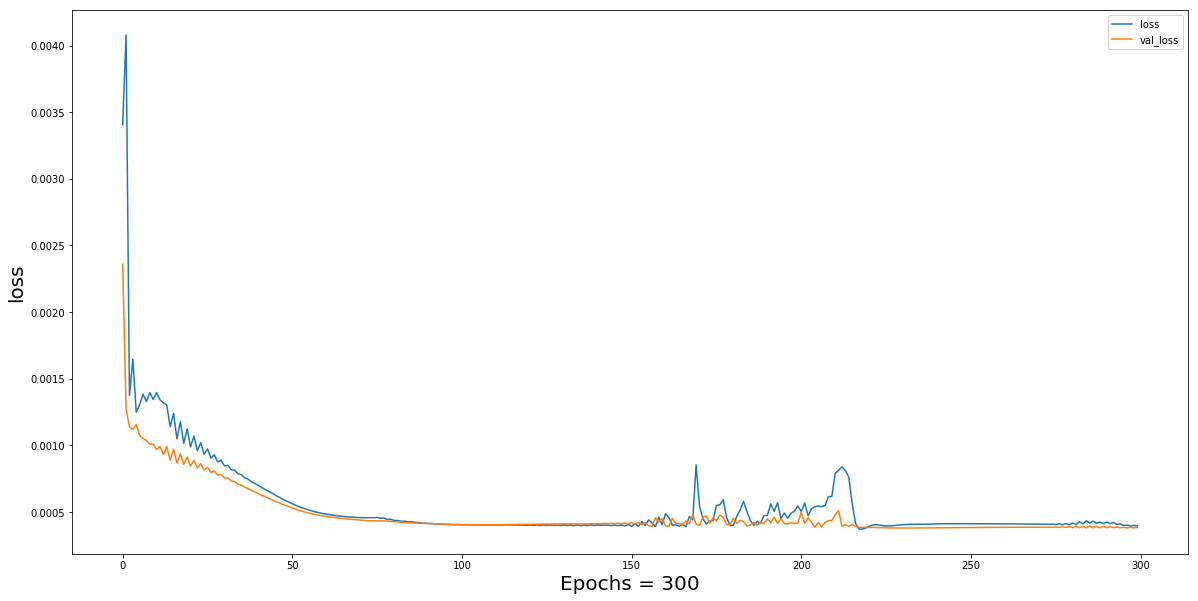

In [21]:
plt.plot(historyt.history['loss'],label='loss')
plt.plot(historyt.history['val_loss'],label='val_loss')
plt.xlabel('Epochs = 300',fontsize=20)
plt.ylabel('loss',fontsize=20)
plt.legend()
plt.show()

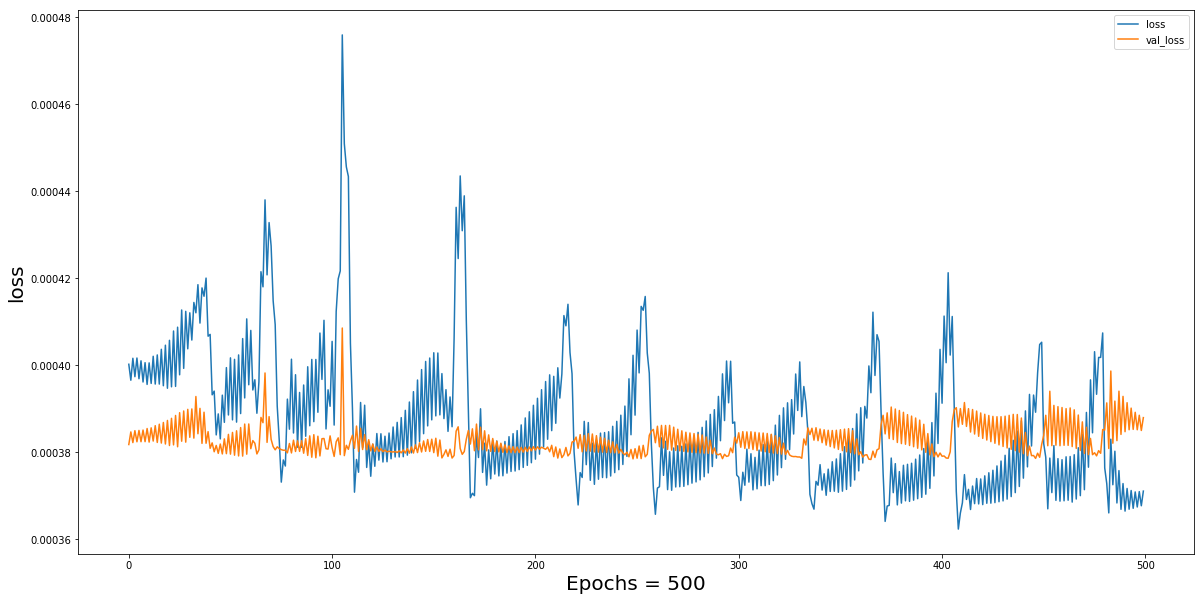

In [22]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs = 500',fontsize=20)
plt.ylabel('loss',fontsize=20)
plt.legend()
plt.show()

## Testing the model

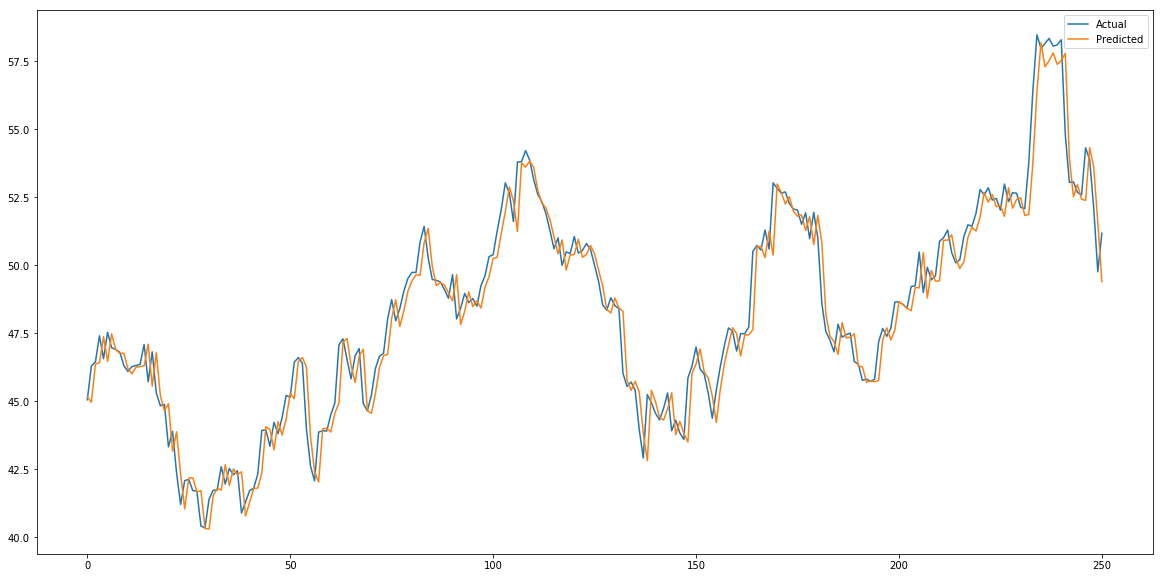

In [23]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)),label='Actual')
plt.plot(scl.inverse_transform(Xt),label='Predicted')
plt.legend()
plt.show();

## Predicting for every Point in the test Data

In [24]:
act=[]
pred =[]
for i in range(len(X_test)):
    Xt = model.predict(X_test[i].reshape(1,7,1))
    print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
    pred.append(scl.inverse_transform(Xt))
    act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[45.155376]], actual:[[45.06]]
predicted:[[44.970795]], actual:[[46.3]]
predicted:[[46.36122]], actual:[[46.45]]
predicted:[[46.429787]], actual:[[47.41]]
predicted:[[47.374245]], actual:[[46.57]]
predicted:[[46.46497]], actual:[[47.54]]
predicted:[[47.481583]], actual:[[46.97]]
predicted:[[46.901302]], actual:[[46.91]]
predicted:[[46.76443]], actual:[[46.81]]
predicted:[[46.768528]], actual:[[46.32]]
predicted:[[46.209267]], actual:[[46.1]]
predicted:[[46.01404]], actual:[[46.28]]
predicted:[[46.260017]], actual:[[46.32]]
predicted:[[46.279663]], actual:[[46.36]]
predicted:[[46.30957]], actual:[[47.09]]
predicted:[[47.102516]], actual:[[45.72]]
predicted:[[45.560143]], actual:[[46.82]]
predicted:[[46.789265]], actual:[[45.31]]
predicted:[[45.208492]], actual:[[44.84]]
predicted:[[44.65896]], actual:[[44.89]]
predicted:[[44.911995]], actual:[[43.33]]
predicted:[[43.17325]], actual:[[43.9]]
predicted:[[43.881687]], actual:[[42.37]]
predicted:[[42.31239]], actual:[[41.21]]
pre

predicted:[[50.925476]], actual:[[51.3]]
predicted:[[51.12168]], actual:[[50.47]]
predicted:[[50.269985]], actual:[[50.09]]
predicted:[[49.885334]], actual:[[50.21]]
predicted:[[50.119244]], actual:[[51.06]]
predicted:[[51.021633]], actual:[[51.49]]
predicted:[[51.404438]], actual:[[51.44]]
predicted:[[51.2625]], actual:[[51.92]]
predicted:[[51.78775]], actual:[[52.79]]
predicted:[[52.67834]], actual:[[52.59]]
predicted:[[52.32469]], actual:[[52.85]]
predicted:[[52.6039]], actual:[[52.4]]
predicted:[[52.153835]], actual:[[52.46]]
predicted:[[52.207066]], actual:[[52.03]]
predicted:[[51.802082]], actual:[[52.99]]
predicted:[[52.850483]], actual:[[52.34]]
predicted:[[52.099865]], actual:[[52.67]]
predicted:[[52.425564]], actual:[[52.65]]
predicted:[[52.485023]], actual:[[52.13]]
predicted:[[51.831318]], actual:[[52.08]]
predicted:[[51.870865]], actual:[[53.78]]
predicted:[[53.741554]], actual:[[56.42]]
predicted:[[56.385555]], actual:[[58.47]]
predicted:[[58.1871]], actual:[[57.98]]
pred

## Calculating Mean Square Error

In [25]:
rms = 0
for i in range(len(pred)):
    rms += np.power((act[i]-pred[i]),2)

In [27]:
rmse = (rms/len(pred))**.5
mse = rms/len(pred)
print('Root mean squared error =',rmse[0][0],'\nMean Squared error =',mse[0][0])

Root mean squared error = 0.8951924294003626 
Mean Squared error = 0.8013694856557231
